# Decomposed_Learning_Results (CL* Algorithm)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp, kstest, shapiro, pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
realTestsDf =  pd.read_csv('Results/Parameters/Real-Tests/Results.csv',index_col=False)
p2pTestsDf = pd.read_csv('Results/Parameters/Generated-Tests/Point-To-Point/Results.csv', index_col=False)
ringTestsDf = pd.read_csv('Results/Parameters/Generated-Tests/Ring/Results.csv', index_col=False)
starTestsDf = pd.read_csv('Results/Parameters/Generated-Tests/Star/Results.csv', index_col=False)
meshTestsDf = pd.read_csv('Results/Parameters/Generated-Tests/Mesh/Results.csv', index_col=False)

## Clean data

In [3]:
def roundData(data):
  return round(data, 3)

In [4]:
def dropNas(data):
    data.dropna(axis=1, how='all')
    data.dropna()
    return(data)
    
realTestsDf = dropNas(realTestsDf)
p2pTestsDf = dropNas(p2pTestsDf)
ringTestsDf = dropNas(ringTestsDf)
starTestsDf = dropNas(starTestsDf)
meshTestsDf = dropNas(meshTestsDf)

In [5]:
# Calculate mean without outliers
from scipy import stats
def trimmed_mean(x):
  z = stats.zscore(x)
  d_z = x.loc[z<3,]
  return d_z.mean()

## Statistical Analysis

We cluster the benchmark into eight categories based on the FSM’s number of states to summerize the results and illusterate them.

In [6]:
# Data Distribution
def printDataInfo(data, testType):
    print("For " + testType + "Tests:")
    print("\tCount:  ",data['FILE_NAME'].unique().size)
    print("\tMin:    ",data.groupby('FILE_NAME').agg(min)['STATES'].min())
    print("\tMax:    ",data.groupby('FILE_NAME').agg(min)['STATES'].max())

    print("\tmean:   ", data.groupby('FILE_NAME').agg(min)['STATES'].mean())

    print("\tstd:    ", data.groupby('FILE_NAME').agg(min)['STATES'].std())

In [7]:
printDataInfo(realTestsDf, 'Real')
printDataInfo(p2pTestsDf, 'Point-To-Point')
printDataInfo(ringTestsDf, 'Ring')
printDataInfo(starTestsDf, 'Star')
printDataInfo(meshTestsDf, 'Mesh')

For RealTests:
	Count:   222
	Min:     104
	Max:     38880
	mean:    8888.603603603604
	std:     9732.67431383443
For Point-To-PointTests:
	Count:   100
	Min:     110
	Max:     29600
	mean:    6765.21
	std:     8515.524717718856
For RingTests:
	Count:   100
	Min:     122
	Max:     27440
	mean:    4514.89
	std:     6153.094415557725
For StarTests:
	Count:   100
	Min:     180
	Max:     25920
	mean:    5151.83
	std:     6969.117492722714
For MeshTests:
	Count:   100
	Min:     180
	Max:     27648
	mean:    4737.67
	std:     6470.6459937836735


C:\Users\Aryan\AppData\Local\Temp\ipykernel_13464\2789857924.py:5: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  print("\tMin:    ",data.groupby('FILE_NAME').agg(min)['STATES'].min())
C:\Users\Aryan\AppData\Local\Temp\ipykernel_13464\2789857924.py:6: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  print("\tMax:    ",data.groupby('FILE_NAME').agg(min)['STATES'].max())
C:\Users\Aryan\AppData\Local\Temp\ipykernel_13464\2789857924.py:8: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep

In [8]:
# calculate the progress 
def calculateProgress(data):
    data['CLSTAR_TOTAL_RST_progress'] = (1 - (data['CLSTAR_TOTAL_RST'] / data['CLSTAR_TOTAL_RST']))*100
    data['CLSTAR_TOTAL_SYM_progress'] = (1 - (data['CLSTAR_TOTAL_SYM'] / data['CLSTAR_TOTAL_SYM']))*100

    data['CLSTAR_MQ_SYM_progress'] = (1 - (data['CLSTAR_MQ_SYM'] / data['CLSTAR_MQ_SYM']))*100
    data['CLSTAR_MQ_RST_progress'] = (1 - (data['CLSTAR_MQ_RST'] / data['CLSTAR_MQ_RST']))*100
    data['CLSTAR_EQ_SYM_progress'] = (1 - (data['CLSTAR_EQ_SYM'] / data['CLSTAR_EQ_SYM']))*100
    data['CLSTAR_EQ_RST_progress'] = (1 - (data['CLSTAR_EQ_RST'] / data['CLSTAR_EQ_RST']))*100
    
    return(data)


In [9]:
realTestsDf = calculateProgress(realTestsDf)
p2pTestsDf = calculateProgress(p2pTestsDf)
ringTestsDf = calculateProgress(ringTestsDf)
starTestsDf = calculateProgress(starTestsDf)
meshTestsDf = calculateProgress(meshTestsDf)

# Plots

In [10]:
sns.set(rc={'figure.figsize':(15,6)})

In [11]:
# @title Fig.3: The effect of FSM size in terms of number of components and states on total number of input symbols.
def plotInputSymbols(data, testType):
    d2 = data[['STATES','CLSTAR_COMPONENTS', 'LSTAR_TOTAL_SYM', 'CLSTAR_TOTAL_SYM']]

    d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_TOTAL_SYM',  'CLSTAR_TOTAL_SYM', 'CLSTAR_COMPONENTS', 'STATES']] 
    d2 = d2.set_index(['#states','#components'])

    d2 = d2[['L*',  'SCL*']].stack().reset_index()
    d2 = d2.rename(columns={"level_2": "method", 0: "total number of input symbols"})



    g = sns.pairplot(d2, x_vars=["#states", "#components"], y_vars=["total number of input symbols"],
                hue="method", height=5, aspect=1.2, kind="reg", palette=['r', 'g']);
    g.fig.suptitle(testType, y=1.08)
    plt.yscale('log')


C:\Users\Aryan\AppData\Local\Temp\ipykernel_13464\2458553643.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_TOTAL_SYM',  'CLSTAR_TOTAL_SYM', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_13464\2458553643.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_TOTAL_SYM',  'CLSTAR_TOTAL_SYM', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipyk

C:\Users\Aryan\AppData\Local\Temp\ipykernel_13464\2458553643.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_TOTAL_SYM',  'CLSTAR_TOTAL_SYM', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_13464\2458553643.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_TOTAL_SYM',  'CLSTAR_TOTAL_SYM', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipyk

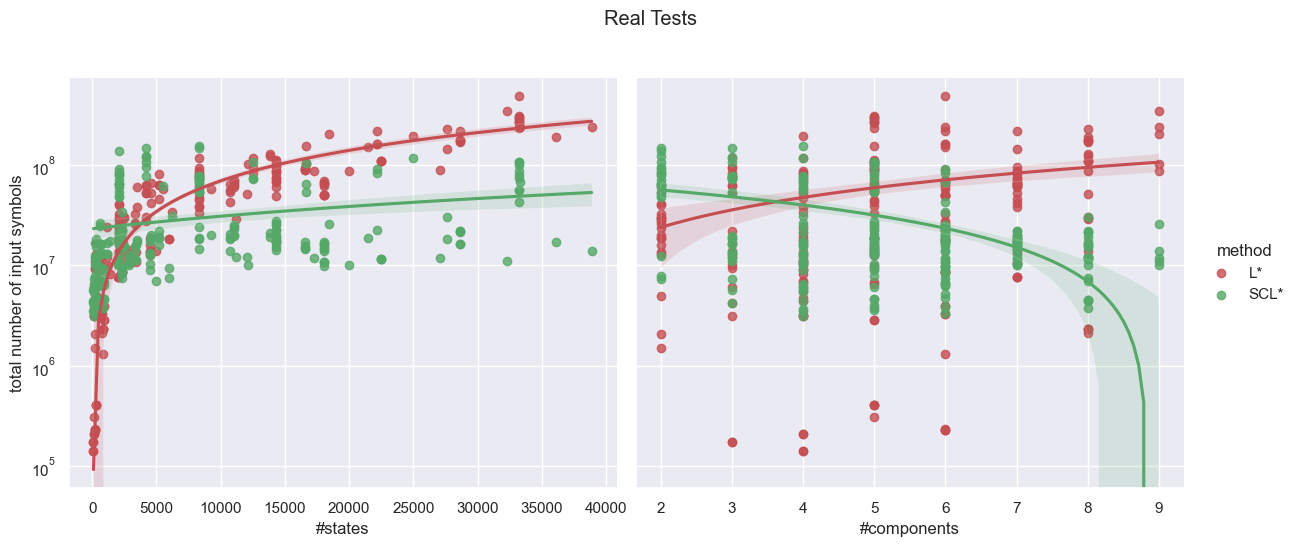

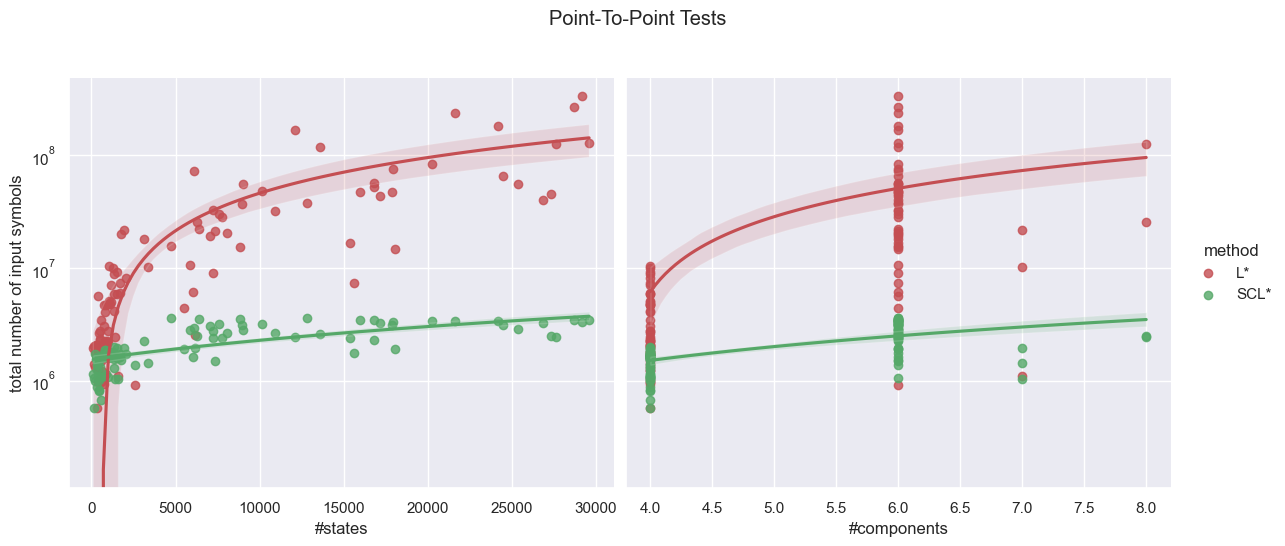

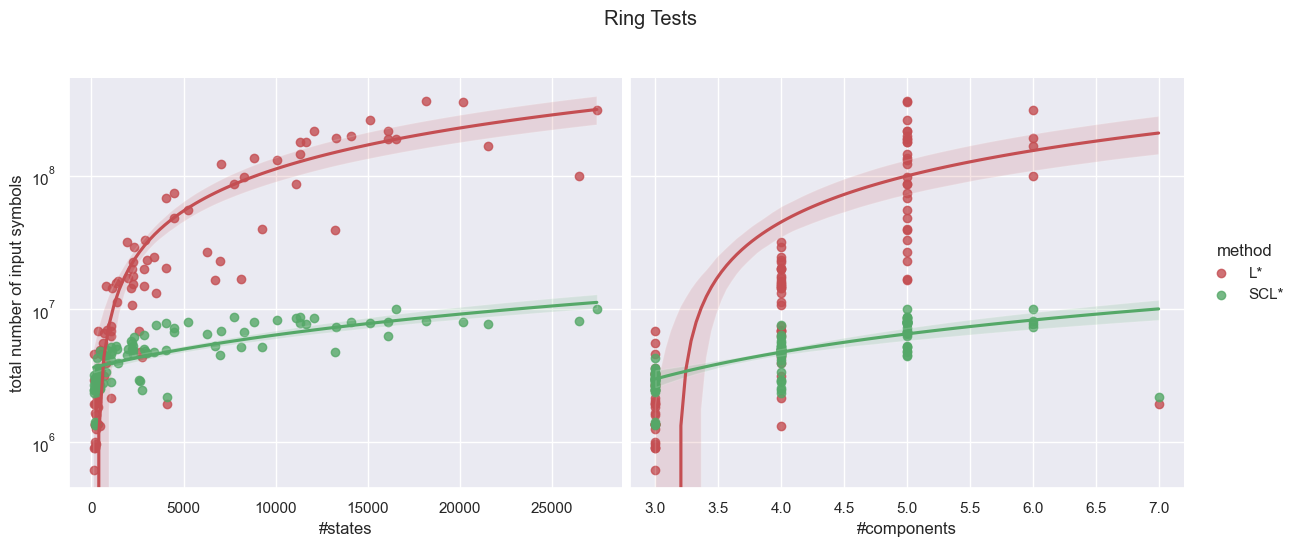

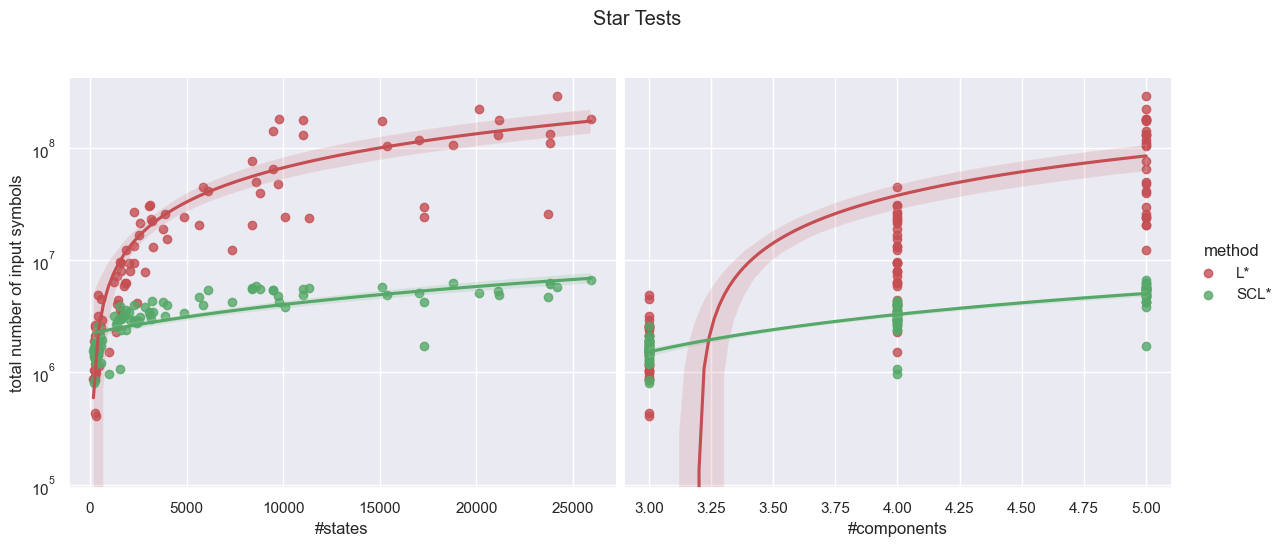

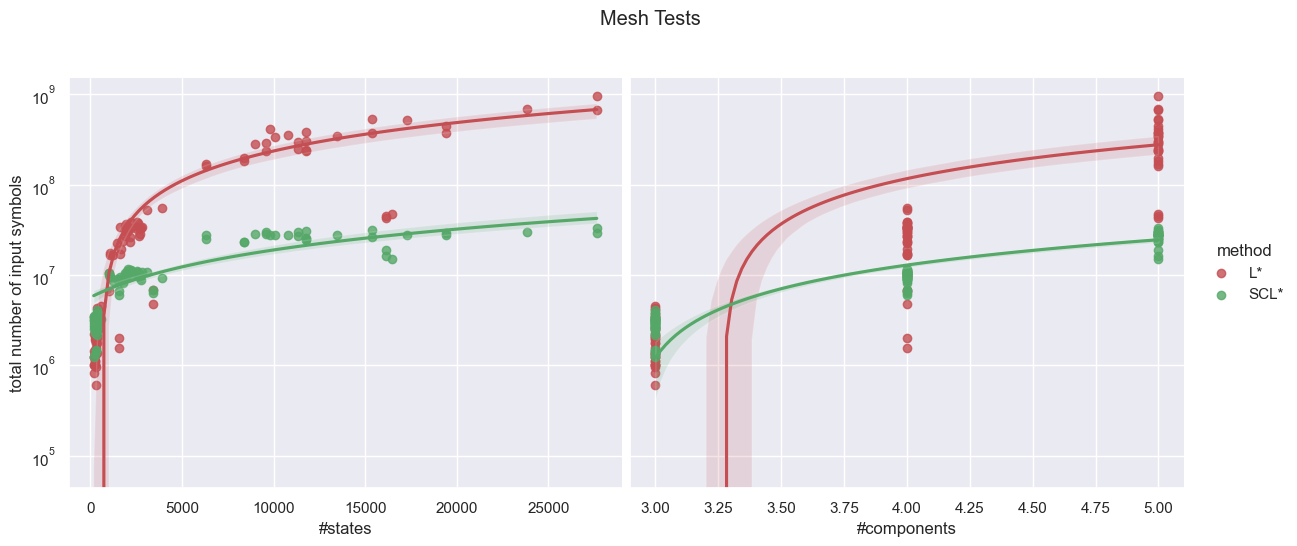

In [12]:
plotInputSymbols(realTestsDf, 'Real Tests')
plotInputSymbols(p2pTestsDf, 'Point-To-Point Tests')
plotInputSymbols(ringTestsDf, 'Ring Tests')
plotInputSymbols(starTestsDf, 'Star Tests')
plotInputSymbols(meshTestsDf, 'Mesh Tests')

In [13]:
# @title Fig.4: The effect of FSM size in terms of number of components and states on total number of input resets.
def plotResets(data, testType):
    d2 = data[['STATES','CLSTAR_COMPONENTS', 'LSTAR_TOTAL_RST', 'CLSTAR_TOTAL_RST']]

    d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_TOTAL_RST',  'CLSTAR_TOTAL_RST', 'CLSTAR_COMPONENTS', 'STATES']] 
    d2 = d2.set_index(['#states','#components'])

    d2 = d2[['L*',  'SCL*']].stack().reset_index()
    d2 = d2.rename(columns={"level_2": "method", 0: "total number of resets"})

    g = sns.pairplot(d2, x_vars=["#states", "#components"], y_vars=["total number of resets"],
                hue="method", height=5, aspect=1.2, kind="reg", palette=['r', 'g']);
    g.fig.suptitle(testType, y=1.08)
    plt.yscale('log')


C:\Users\Aryan\AppData\Local\Temp\ipykernel_13464\875317993.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_TOTAL_RST',  'CLSTAR_TOTAL_RST', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_13464\875317993.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_TOTAL_RST',  'CLSTAR_TOTAL_RST', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipyker

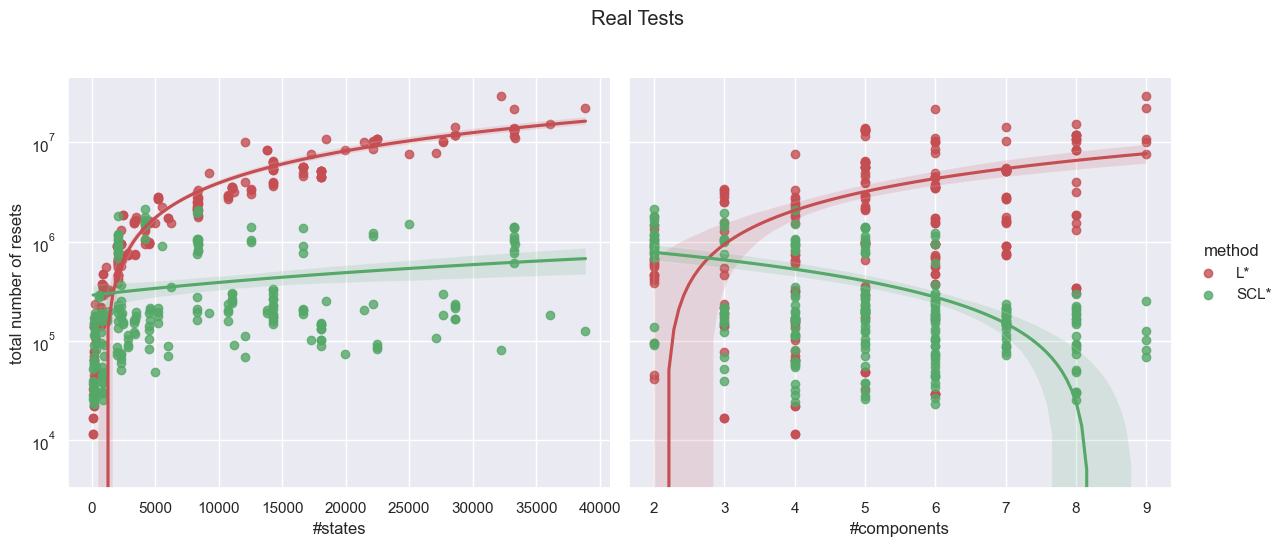

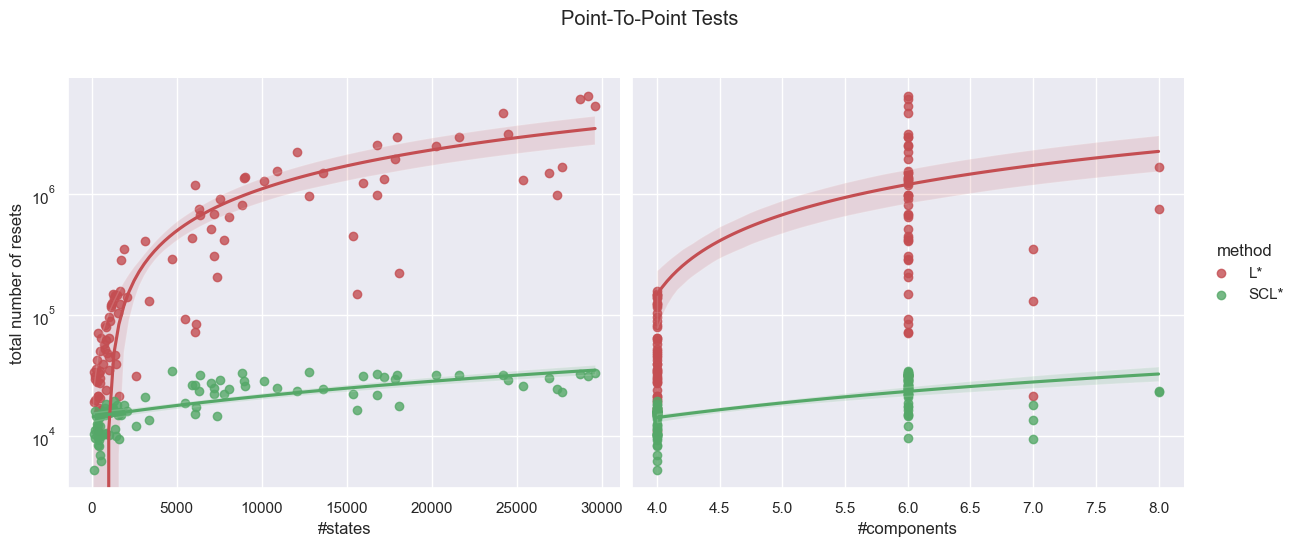

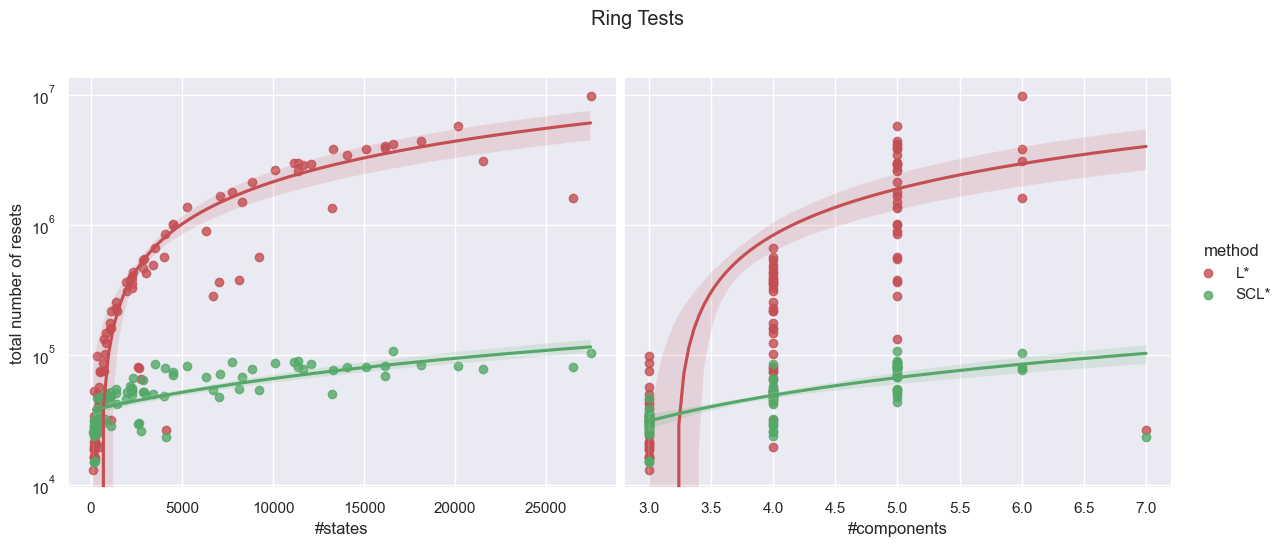

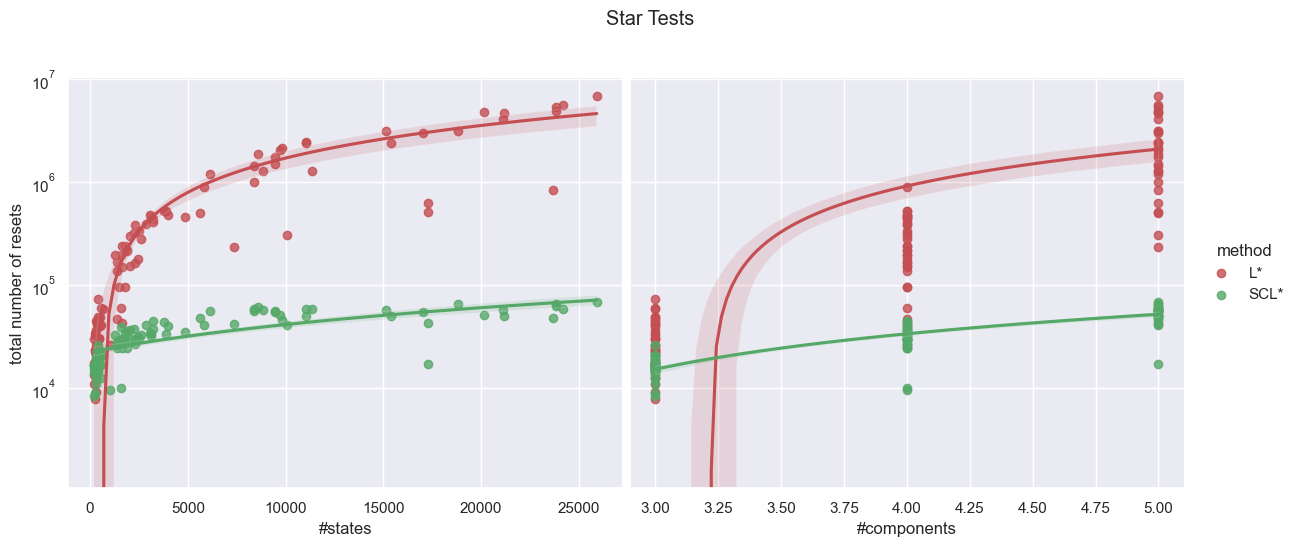

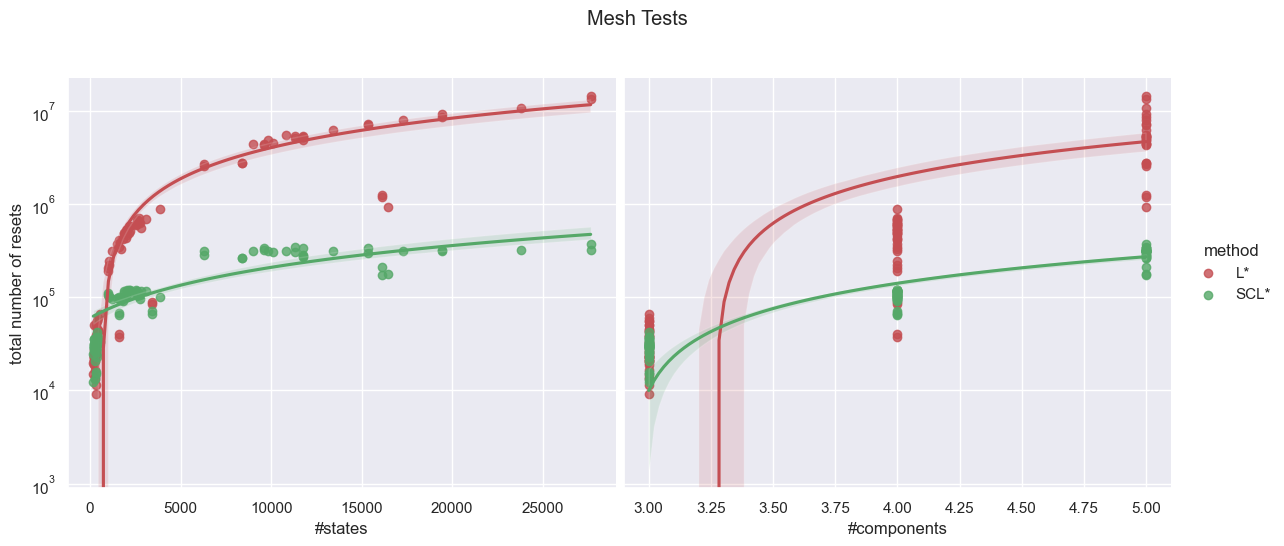

In [14]:
plotResets(realTestsDf, 'Real Tests')
plotResets(p2pTestsDf, 'Point-To-Point Tests')
plotResets(ringTestsDf, 'Ring Tests')
plotResets(starTestsDf, 'Star Tests')
plotResets(meshTestsDf, 'Mesh Tests')

In [15]:
# @title Fig.3: The effect of FSM size in terms of number of components and states on total number of input symbols.
def plotEqs(data, testType):
    d2 = data[['STATES','CLSTAR_COMPONENTS', 'LSTAR_EQs', 'CLSTAR_EQs']]

    d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_EQs', 'CLSTAR_EQs', 'CLSTAR_COMPONENTS', 'STATES']] 
    d2 = d2.set_index(['#states','#components'])

    d2 = d2[['L*',  'SCL*']].stack().reset_index()
    d2 = d2.rename(columns={"level_2": "method", 0: "total number of Equivanlence Queries"})

    g = sns.pairplot(d2, x_vars=["#states", "#components"], y_vars=["total number of Equivanlence Queries"],
                hue="method", height=5, aspect=1.2, kind="reg", palette=['r', 'g']);
    g.fig.suptitle(testType, y=1.08)
    plt.yscale('log')

C:\Users\Aryan\AppData\Local\Temp\ipykernel_13464\680782416.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_EQs', 'CLSTAR_EQs', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_13464\680782416.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_EQs', 'CLSTAR_EQs', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_13464\680782416.py:5: 

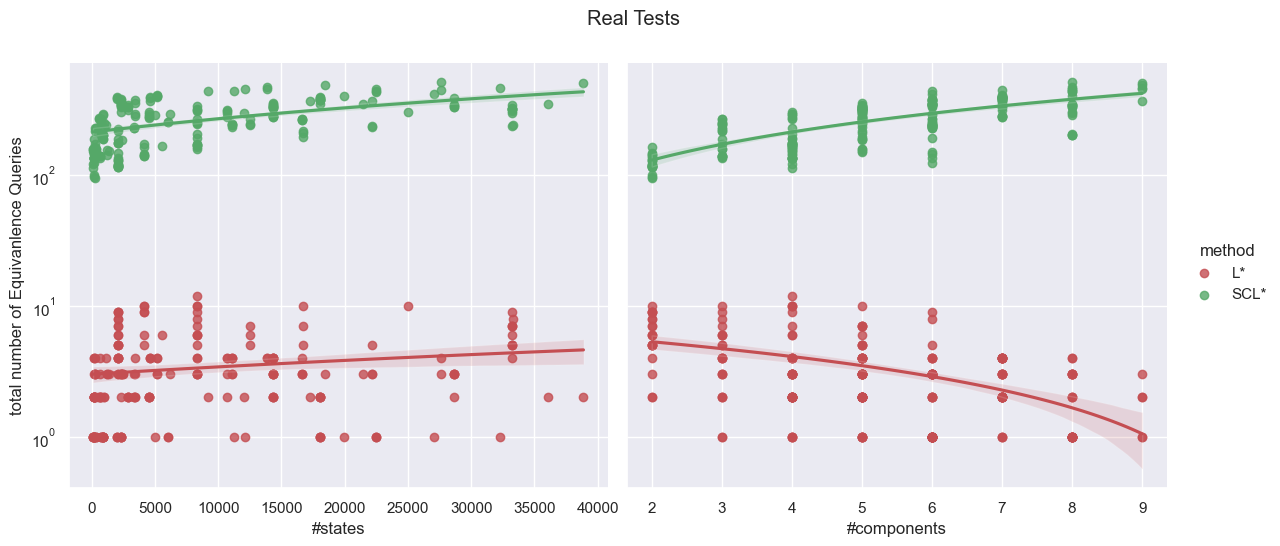

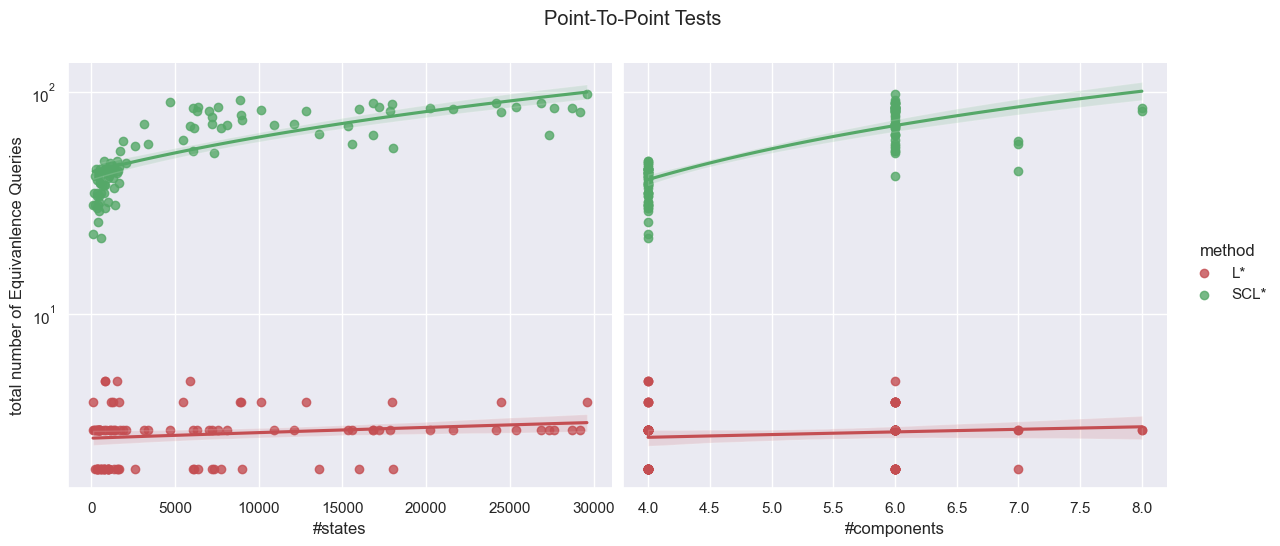

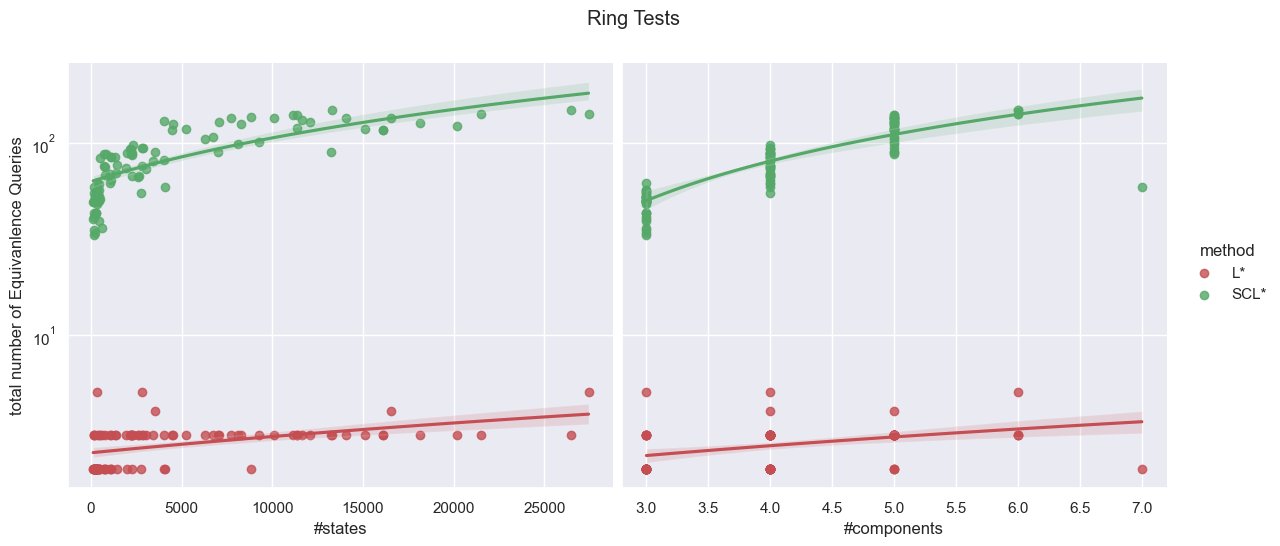

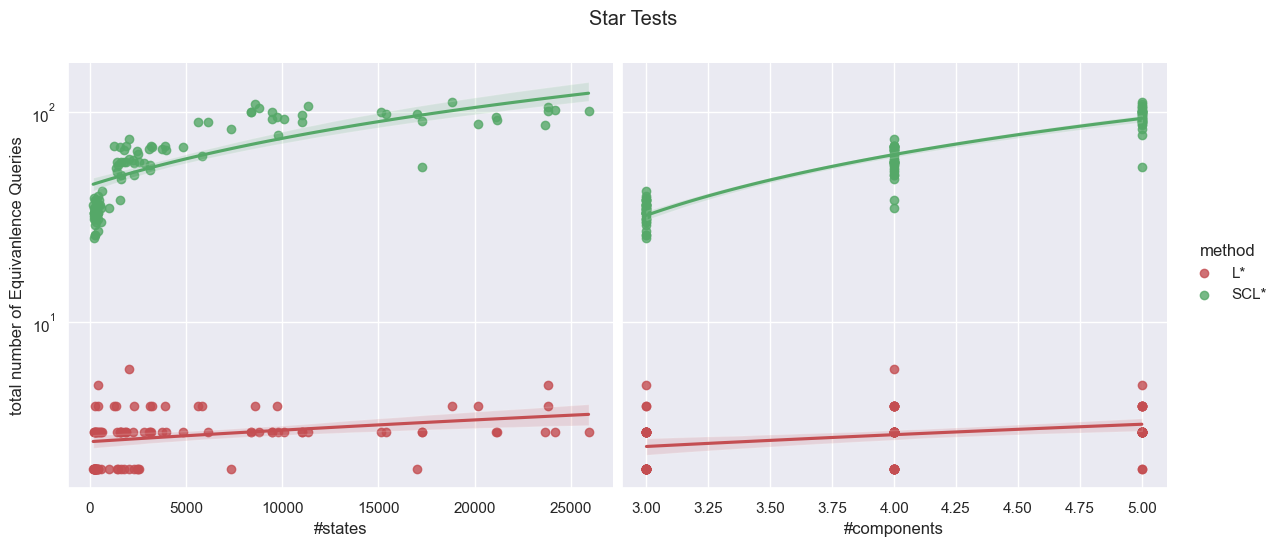

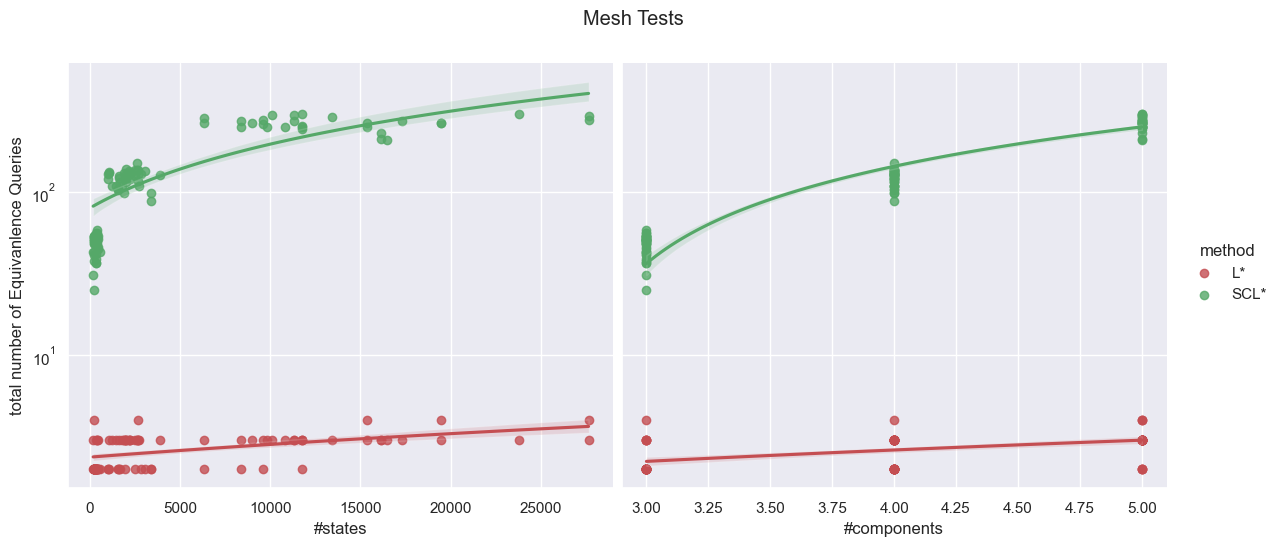

In [16]:
plotEqs(realTestsDf, 'Real Tests')
plotEqs(p2pTestsDf, 'Point-To-Point Tests')
plotEqs(ringTestsDf, 'Ring Tests')
plotEqs(starTestsDf, 'Star Tests')
plotEqs(meshTestsDf, 'Mesh Tests')

In [17]:
def plotMqs(data, testType):
    d2 = data[['STATES','CLSTAR_COMPONENTS', 'LSTAR_MQs', 'CLSTAR_MQs']]

    d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_MQs', 'CLSTAR_MQs', 'CLSTAR_COMPONENTS', 'STATES']] 
    d2 = d2.set_index(['#states','#components'])

    d2 = d2[['L*',  'SCL*']].stack().reset_index()
    d2 = d2.rename(columns={"level_2": "method", 0: "total number of Membership Queries"})

    g = sns.pairplot(d2, x_vars=["#states", "#components"], y_vars=["total number of Membership Queries"],
                hue="method", height=5, aspect=1.2, kind="reg", palette=['r', 'g']);
    g.fig.suptitle(testType, y=1.08)
    plt.yscale('log')

C:\Users\Aryan\AppData\Local\Temp\ipykernel_13464\277059711.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_MQs', 'CLSTAR_MQs', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_13464\277059711.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_MQs', 'CLSTAR_MQs', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_13464\277059711.py:4: 

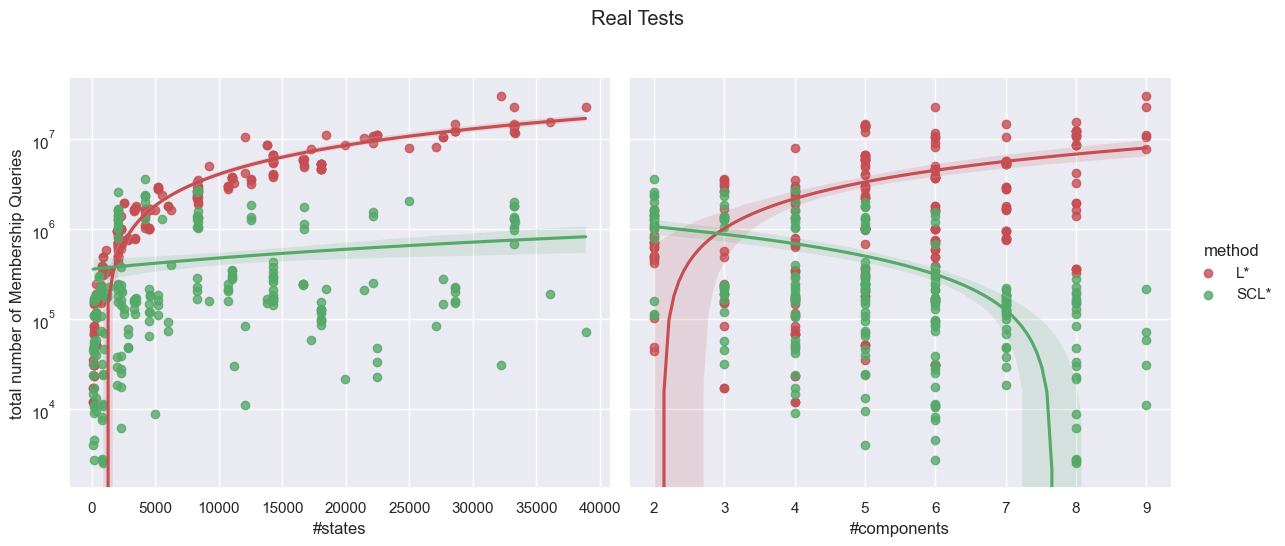

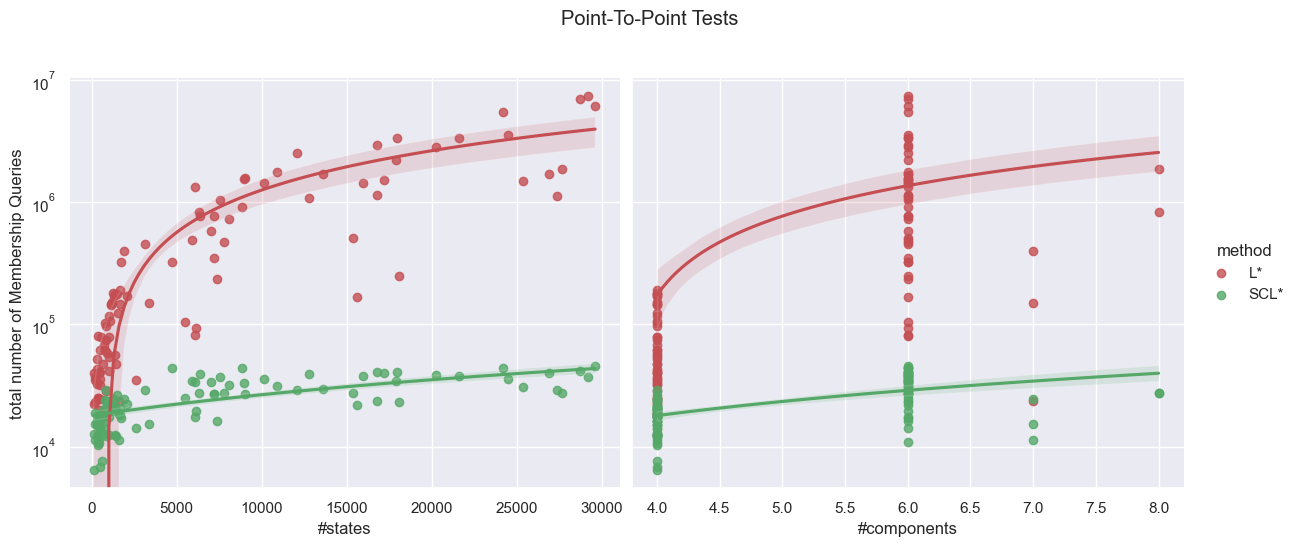

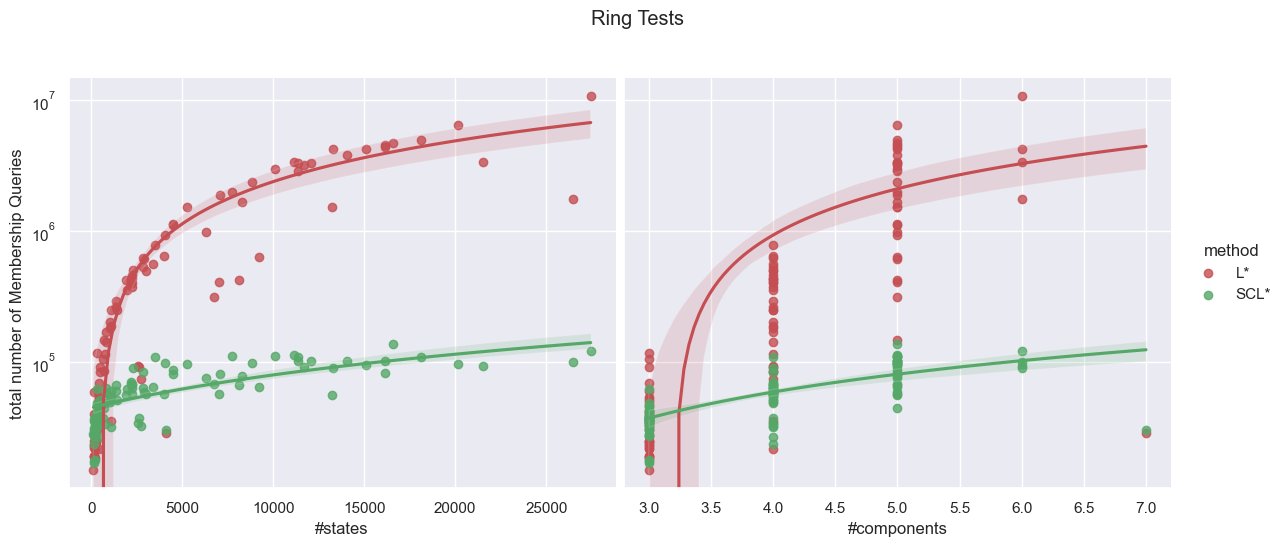

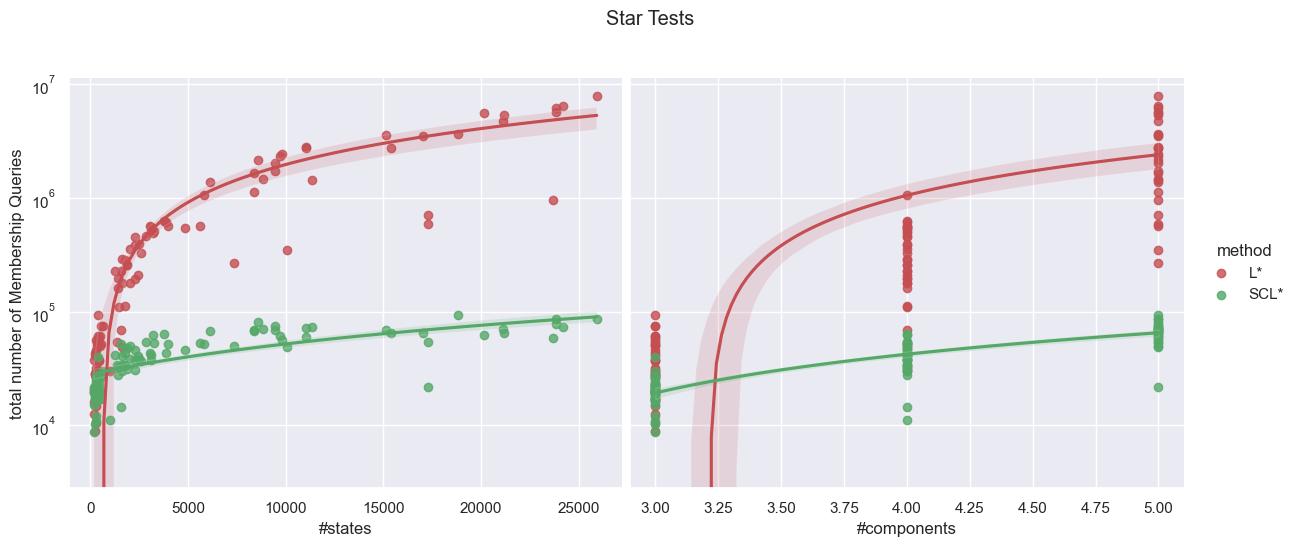

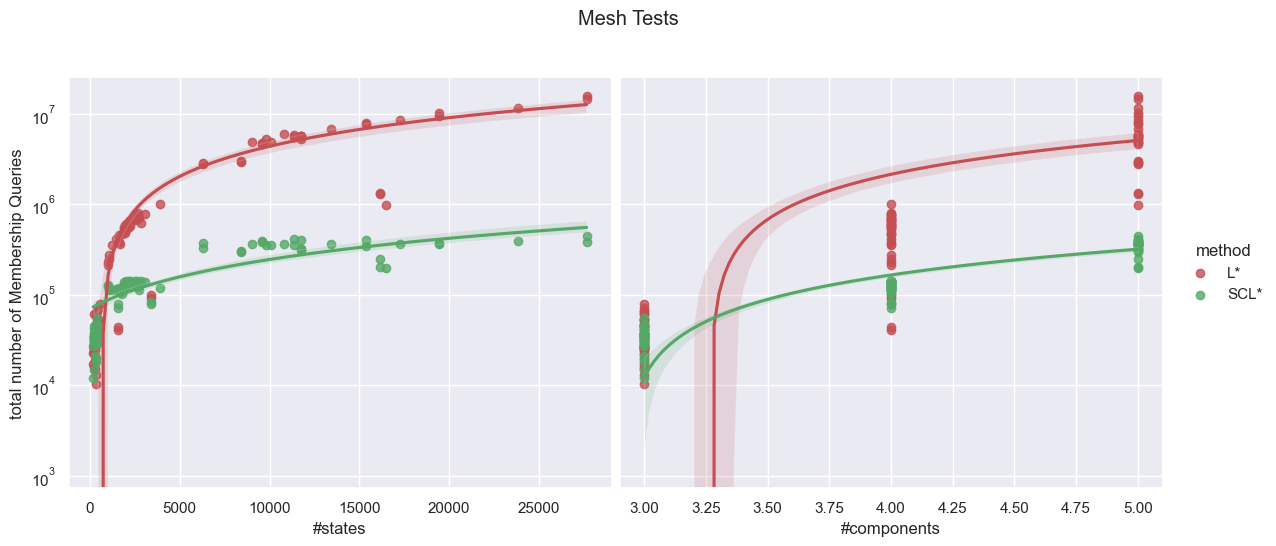

In [18]:
plotMqs(realTestsDf, 'Real Tests')
plotMqs(p2pTestsDf, 'Point-To-Point Tests')
plotMqs(ringTestsDf, 'Ring Tests')
plotMqs(starTestsDf, 'Star Tests')
plotMqs(meshTestsDf, 'Mesh Tests')